# Linear Regression Assignment

## Mostafa Khaled 43-1238 

In [161]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as geek

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [162]:
boston = load_boston()
data = pd.DataFrame(boston.data)

data.columns = boston.feature_names

In [163]:
data['PRICE'] = boston.target 


In [164]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Correlation Matrix (RM and price are having a high correleation)

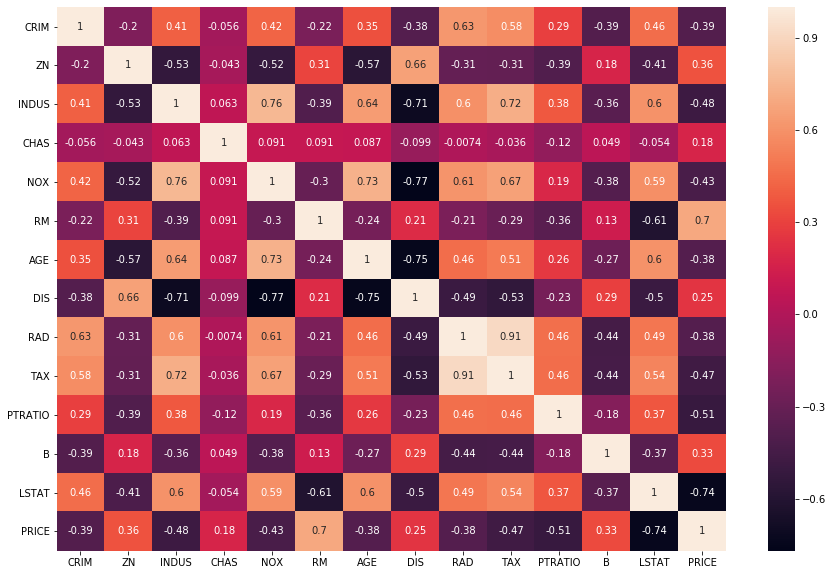

In [22]:
# greater than zero indicates a positive relationship. A value that is less than zero signifies a negative relationship.
import seaborn as sn
plt.figure(figsize=(15,10)) 

corrMatrix = data.corr()
sn.heatmap(corrMatrix, annot=True)

plt.show()

## Sorting the correlation between variables

In [23]:
sorted_mat = corrMatrix.unstack().sort_values()
  
print(sorted_mat)

NOX      DIS       -0.769230
DIS      NOX       -0.769230
         AGE       -0.747881
AGE      DIS       -0.747881
LSTAT    PRICE     -0.737663
PRICE    LSTAT     -0.737663
INDUS    DIS       -0.708027
DIS      INDUS     -0.708027
RM       LSTAT     -0.613808
LSTAT    RM        -0.613808
ZN       AGE       -0.569537
AGE      ZN        -0.569537
TAX      DIS       -0.534432
DIS      TAX       -0.534432
INDUS    ZN        -0.533828
ZN       INDUS     -0.533828
         NOX       -0.516604
NOX      ZN        -0.516604
PTRATIO  PRICE     -0.507787
PRICE    PTRATIO   -0.507787
LSTAT    DIS       -0.496996
DIS      LSTAT     -0.496996
RAD      DIS       -0.494588
DIS      RAD       -0.494588
PRICE    INDUS     -0.483725
INDUS    PRICE     -0.483725
TAX      PRICE     -0.468536
PRICE    TAX       -0.468536
B        RAD       -0.444413
RAD      B         -0.444413
                      ...   
AGE      INDUS      0.644779
INDUS    AGE        0.644779
ZN       DIS        0.664408
DIS      ZN   

# Single variable linear regression

In [291]:
df_single = data.loc[:, ['RM', 'PRICE']]
df_single.head()

,RM,PRICE
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


### Max Scaler

In [292]:
df_max_scaled = df_single.copy()
  
# apply normalization techniques
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# view normalized data
df_max_scaled.head()


,RM,PRICE
0,0.748861,0.480
1,0.731321,0.432
2,0.818337,0.694
3,0.797039,0.668
4,0.814009,0.724


In [293]:
from scipy.spatial.distance import cdist
def draw_scatter(df, col_name1,col_name2, t, cc):
    
    ax1 = plt.scatter(x=df[col_name1],y=df[col_name2], s= [25,25], c= cc)
    plt.title(t)

### Scatter plor of RM vs Price

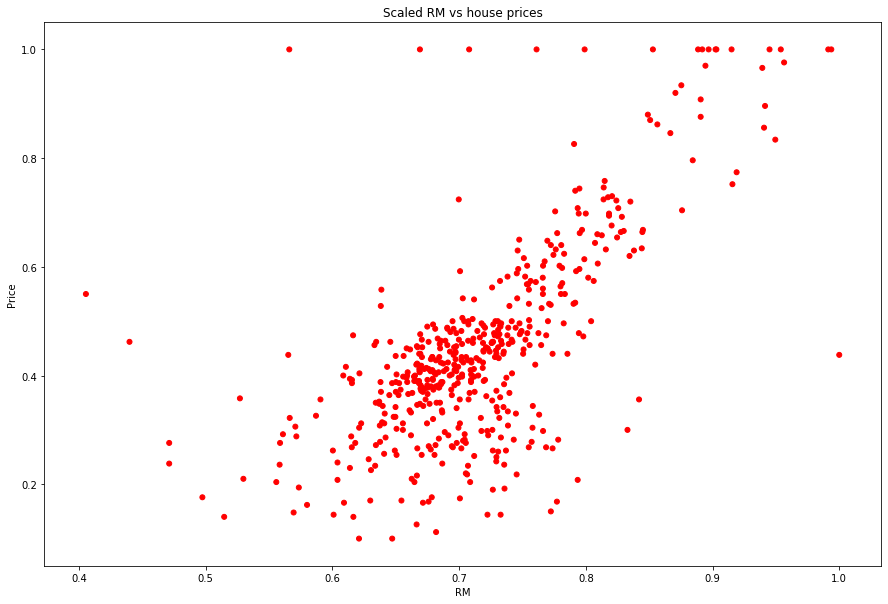

In [294]:
plt.figure(figsize=(15,10)) 
draw_scatter(df_max_scaled, "RM","PRICE", "Scaled RM vs house prices", 'r')

plt.xlabel('RM')
plt.ylabel('Price')
plt.show()

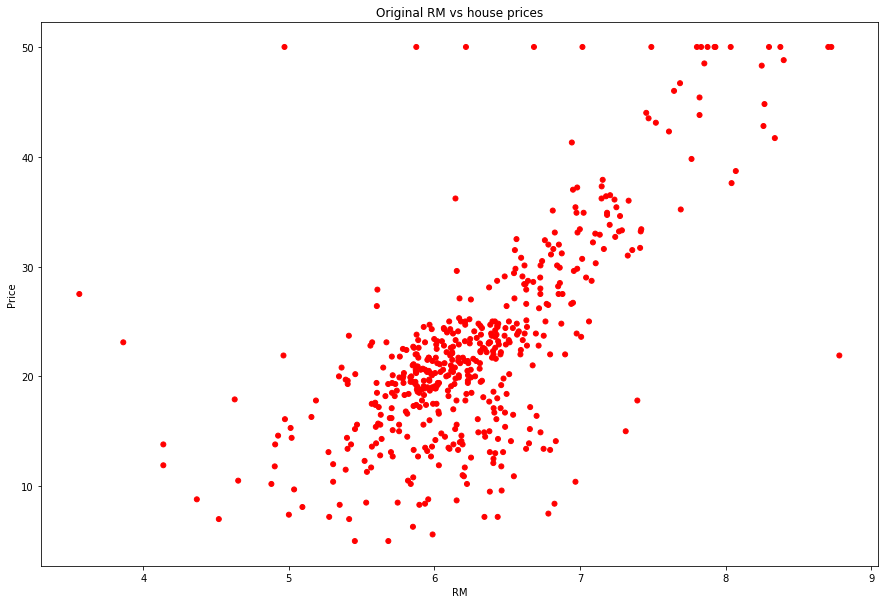

In [295]:
plt.figure(figsize=(15,10)) 

draw_scatter(df_single, "RM","PRICE", "Original RM vs house prices", 'r')
plt.xlabel('RM')
plt.ylabel('Price')
plt.show()

### Preparing data for single variable regression

In [296]:
X_s_1 = df_max_scaled.drop(['PRICE'], axis = 1)
y_s_1 = df_max_scaled['PRICE']

In [297]:
print(X_s_1.head())
print(X_s_1.shape)

         RM
0  0.748861
1  0.731321
2  0.818337
3  0.797039
4  0.814009
(506, 1)


In [298]:
print(y_s_1.head())
print(y_s_1.shape)

0    0.480
1    0.432
2    0.694
3    0.668
4    0.724
Name: PRICE, dtype: float64
(506,)


### Training data

In [299]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_s_1, y_s_1, train_size=0.6, random_state=0)

In [300]:
X_train.shape

(303, 1)

In [301]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### The slope (Theta 1) and intercept (Theta 0)

In [302]:
print("Y intercept")
print(regressor.intercept_)

Y intercept
-0.683149383529964


In [303]:
print("Slope ")
print(regressor.coef_)

Slope 
[1.58492796]


### Plotting linear regression

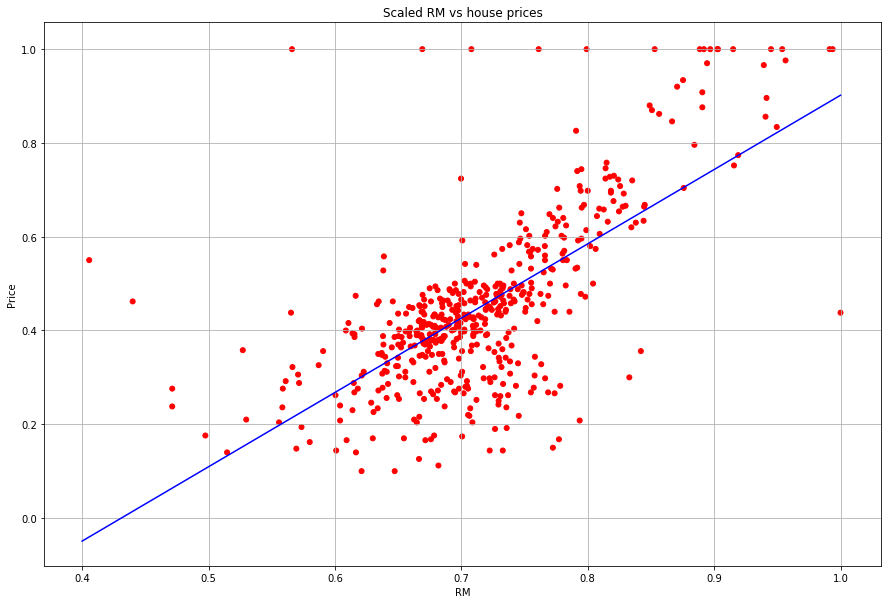

hypothesis:  [1.58492796]  * X +  -0.683149383529964


In [304]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.4,1,3)
y = (regressor.coef_)*x+(regressor.intercept_)
plt.figure(figsize=(15,10)) 

plt.plot(x, y, '-b', label='y=2fefefefefx+1')
draw_scatter(df_max_scaled, "RM","PRICE", "Scaled RM vs house prices", 'r')
plt.xlabel('RM')
plt.ylabel('Price')
plt.grid()
plt.show()
print("hypothesis: ", (regressor.coef_), " * X + ", (regressor.intercept_))

### Predicting Values (Prices) and Evaluating actual vs predicted

In [305]:
y_pred = regressor.predict(X_test)


In [306]:
# dataframe of actual vs predicted prices
df_comp = pd.DataFrame({'Actual_price': y_test, 'Predicted_price': y_pred})
df_comp.head()

,Actual_price,Predicted_price
329,0.452,0.460057
371,1.000,0.438936
219,0.460,0.467277
403,0.166,0.282429
78,0.424,0.441825


### Analyzing the error for predicted prices

In [307]:
from sklearn import metrics
print("Mean Absolute Error= 1/number of points * (|predicted - actual|)")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

print("Mean squared Error= 1/number of points * (|predicted - actual|^2)")
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

print("Root Mean squared Error= Square root (|predicted - actual|^2/ number of non missing points)")
print("standard deviation of the residuals (prediction errors)")
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error= 1/number of points * (|predicted - actual|)
Mean Absolute Error: 0.0874865114158206
Mean squared Error= 1/number of points * (|predicted - actual|^2)
Mean Squared Error: 0.01718765200321611
Root Mean squared Error= Square root (|predicted - actual|^2/ number of non missing points)
standard deviation of the residuals (prediction errors)
Root Mean Squared Error: 0.13110168573750725


### plotting the actual vs predicted prices

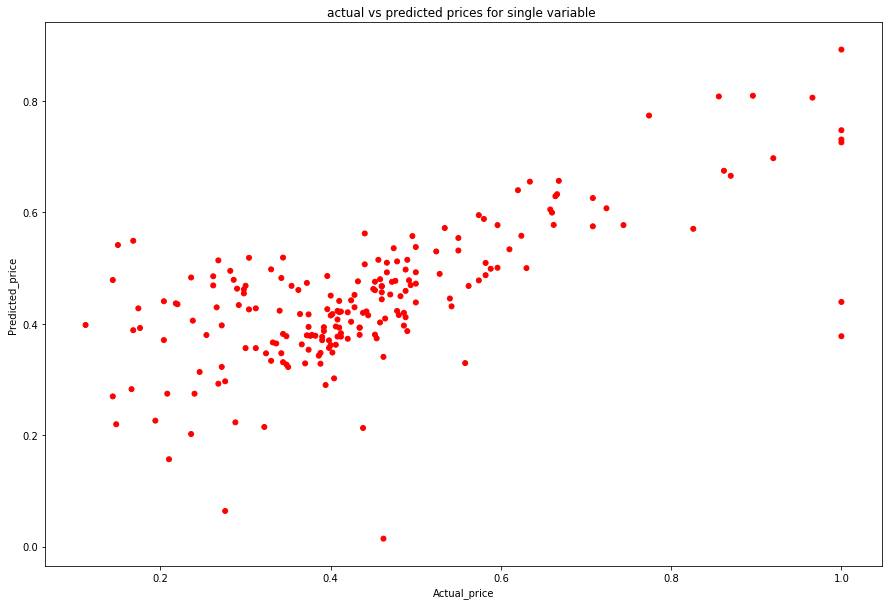

In [308]:
plt.figure(figsize=(15,10)) 

draw_scatter(df_comp, "Actual_price","Predicted_price", "actual vs predicted prices for single variable ", 'r')
plt.xlabel('Actual_price')
plt.ylabel('Predicted_price')
plt.show()

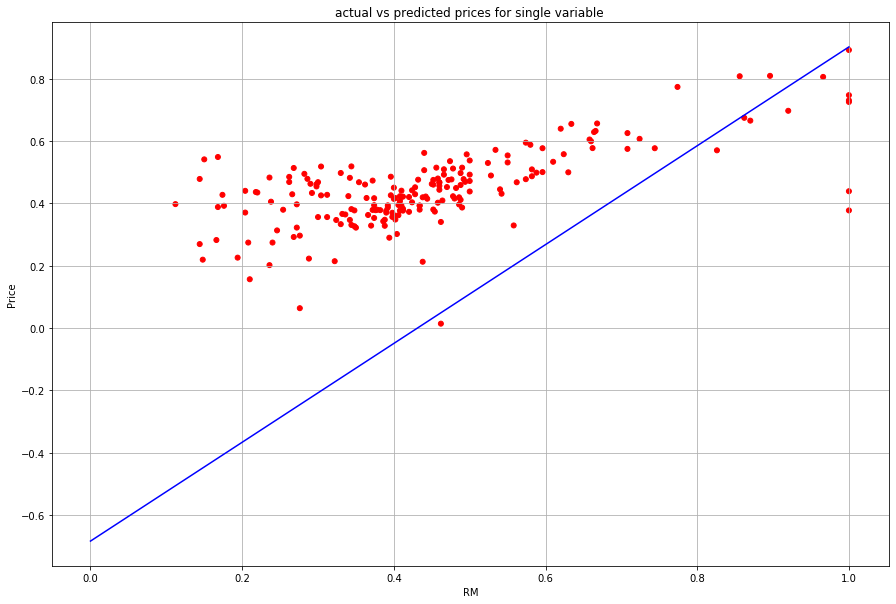

In [309]:
x = np.linspace(0,1,10)
y = (regressor.coef_)*x+(regressor.intercept_)
plt.figure(figsize=(15,10)) 

plt.plot(x, y, '-b', label='y=2x+1')
draw_scatter(df_comp, "Actual_price","Predicted_price", "actual vs predicted prices for single variable ", 'r')
plt.xlabel('RM')
plt.ylabel('Price')
plt.grid()
plt.show()

# Polynomial for single variable

In [190]:
X_s_2 = df_max_scaled.drop(['PRICE'], axis = 1)
y_s_2 = df_max_scaled['PRICE']

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X_s_2, y_s_2, train_size=0.6, random_state=0)

In [192]:
# fit multiple polynomial features
degrees = [1, 2, 3, 4]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), regressor)
    model.fit(X_train, y_train)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = model.predict(X_train)
    y_test_pred[:, i] = model.predict(X_test)
    #y_pred_d1 = y_train_pred[:,1]

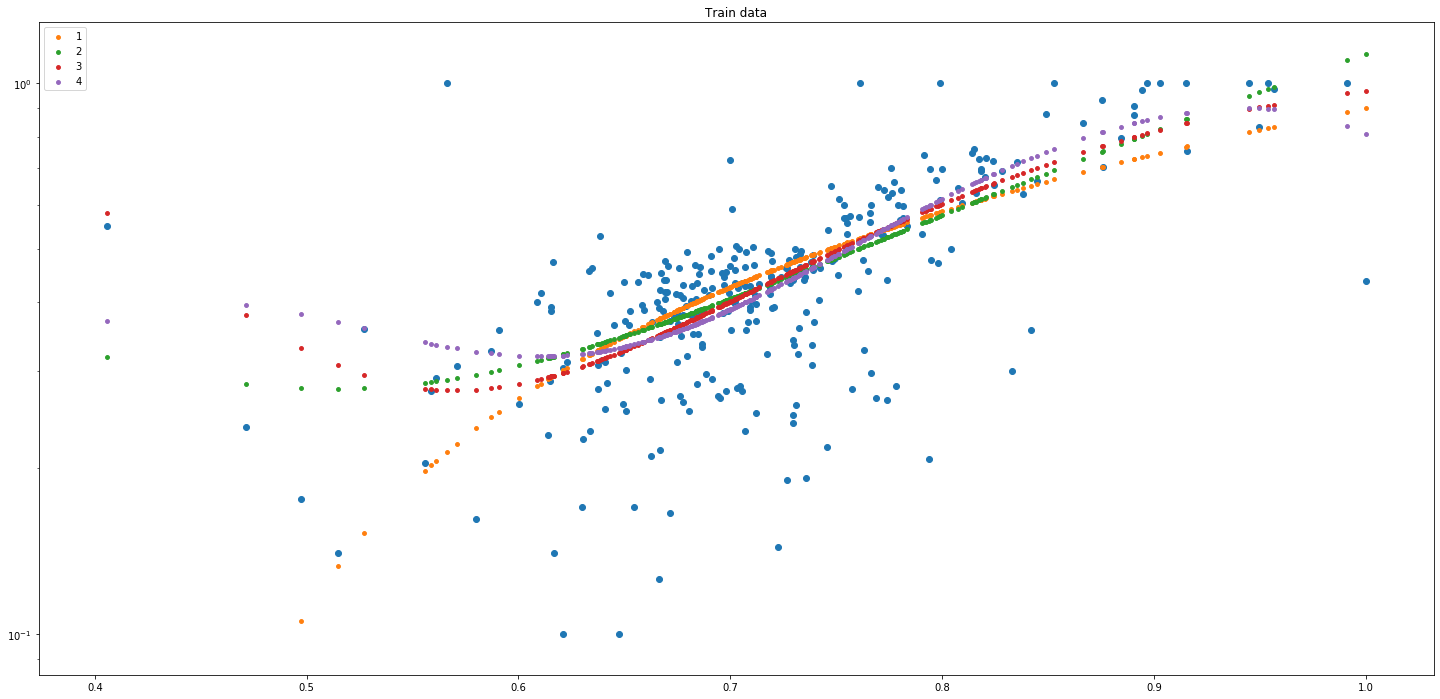

In [193]:
plt.figure(figsize=(25, 12))

# train data
#plt.subplot(121)
plt.scatter(X_train, y_train)
plt.yscale('log')
plt.title("Train data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_train, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')
plt.show()
    
# test data
#plt.subplot(122)


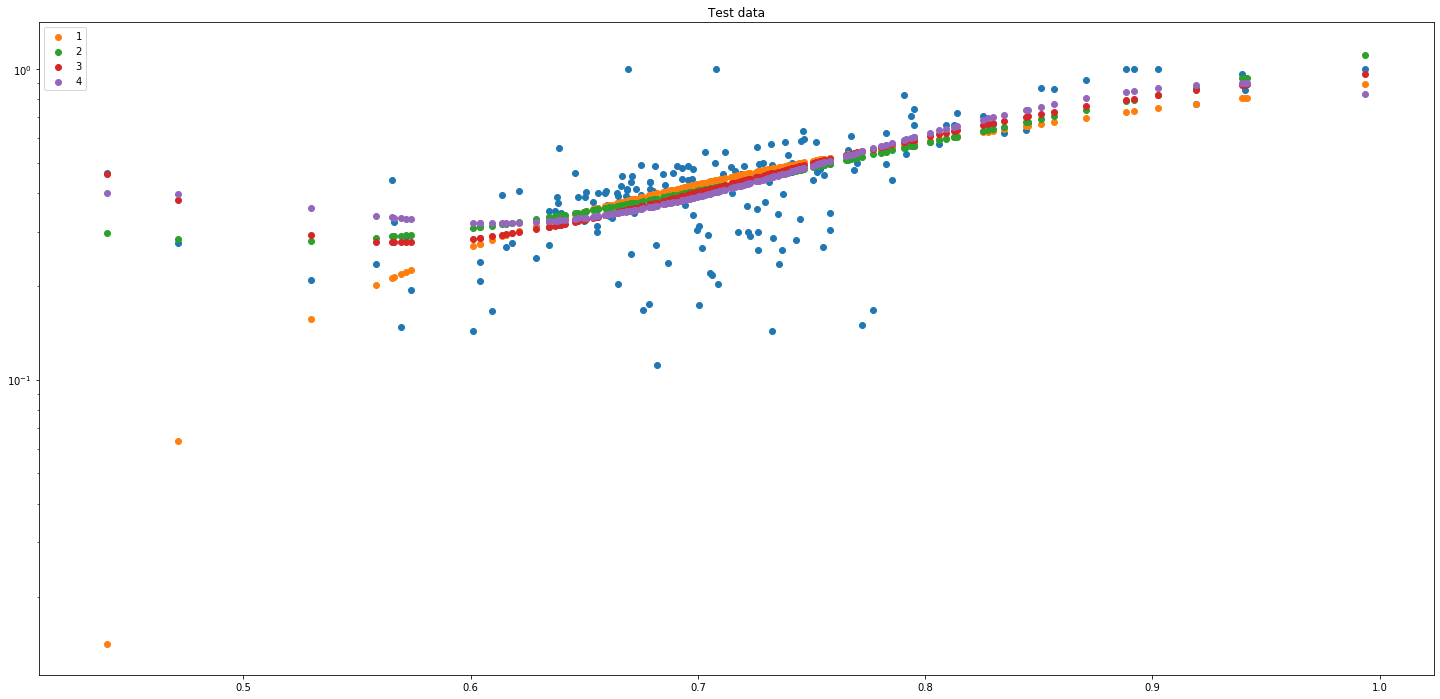

In [194]:
plt.figure(figsize=(25, 12))

plt.scatter(X_test, y_test)
plt.yscale('log')
plt.title("Test data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_test, y_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

In [195]:
print("Using R-squared : \n")
for i, degree in enumerate(degrees):
    train_r2 = round(metrics.r2_score(y_train, y_train_pred[:, i]), 2)
    test_r2 = round(metrics.r2_score(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {}: train error score={}, test error score={}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

Using R-squared : 

Polynomial degree 1: train error score=0.48, test error score=0.48
Polynomial degree 2: train error score=0.54, test error score=0.55
Polynomial degree 3: train error score=0.56, test error score=0.55
Polynomial degree 4: train error score=0.58, test error score=0.55


In [196]:
print("Mean Absolute Error : \n")
for i, degree in enumerate(degrees):
    train_r2 = round(metrics.mean_absolute_error(y_train, y_train_pred[:, i]), 2)
    test_r2 = round(metrics.mean_absolute_error(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {}: train error score={}, test error score={}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

Mean Absolute Error : 

Polynomial degree 1: train error score=0.09, test error score=0.09
Polynomial degree 2: train error score=0.09, test error score=0.08
Polynomial degree 3: train error score=0.08, test error score=0.08
Polynomial degree 4: train error score=0.08, test error score=0.09


In [197]:
y_train_pred_df = pd.DataFrame(y_train_pred)
y_train_df = pd.DataFrame(y_train)
y_train_df.head()

,PRICE
198,0.692
145,0.276
158,0.486
150,0.430
250,0.488


# Polynomial Vs Linear regression Single variable

In [198]:
df_max_scaled.head()

,RM,PRICE
0,0.748861,0.480
1,0.731321,0.432
2,0.818337,0.694
3,0.797039,0.668
4,0.814009,0.724


In [199]:
x_c= df_max_scaled["RM"].to_numpy()
x_p = df_max_scaled["PRICE"].to_numpy()

In [200]:
x_p.shape

(506,)

In [201]:
from sklearn.linear_model import LinearRegression

# Training Model
lm=LinearRegression()
lm.fit(x_c.reshape(-1,1),x_p.reshape(-1,1))
y_pred=lm.predict(x_c.reshape(-1,1))


In [202]:
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x_c.reshape(-1,1),x_p.reshape(-1,1))

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('modal', LinearRegression())])

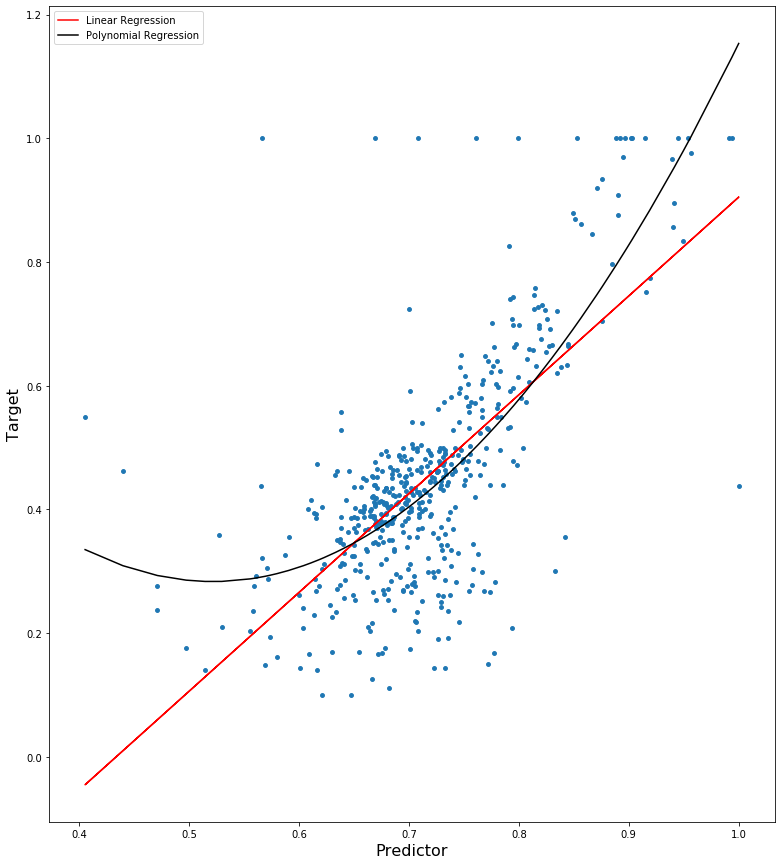

In [203]:
poly_pred=pipe.predict(x_c.reshape(-1,1))
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x_c,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(13,15))
plt.scatter(x_c,x_p,s=15)
plt.plot(x_c,y_pred,color='r',label='Linear Regression')
plt.plot(x_poly,poly_pred,color='black',label='Polynomial Regression')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.legend()
plt.show()
#print("xp", sorted_zip)

### Root meen error for polynomial vs linear regression

In [204]:
from sklearn.metrics import mean_squared_error

print('Root mean squared error for Linear Regression=>',np.sqrt(mean_squared_error(x_p,y_pred)))
print('Root mean squared error for Polynomial Regression=>',np.sqrt(mean_squared_error(x_p,poly_pred)))


Root mean squared error for Linear Regression=> 0.13206142778445124
Root mean squared error for Polynomial Regression=> 0.25317989513357836


# polynomial Regression 2 (Single variable )

In [205]:
X = df_max_scaled.iloc[:,0].values  
y = df_max_scaled.iloc[:,1].values

In [107]:
#from sklearn.preprocessing import PolynomialFeatures
#poly_reg = PolynomialFeatures(degree=2)
#X_poly = poly_reg.fit_transform(X.reshape(-1,1))

In [108]:
#lin_reg2 = LinearRegression()
#lin_reg2.fit(X_poly,y)

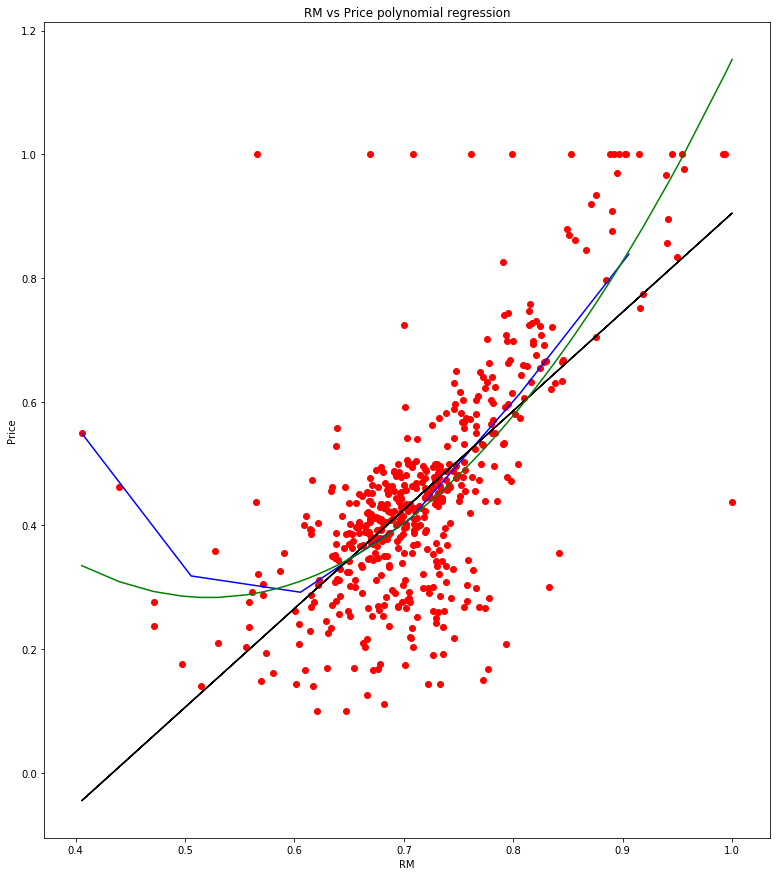

''

In [206]:
''''''
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X.reshape(-1,1))
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)
plt.figure(figsize=(13,15))
 
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 
plt.scatter(X,y, color='red') 
 
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)),color='blue') 

plt.plot(x_c,y_pred,color='black',label='Linear Regression')
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')


 
plt.title("RM vs Price polynomial regression")
plt.xlabel('RM')
plt.ylabel('Price')
plt.show()
''''''

## Polynomial with different degrees

For degree:  0


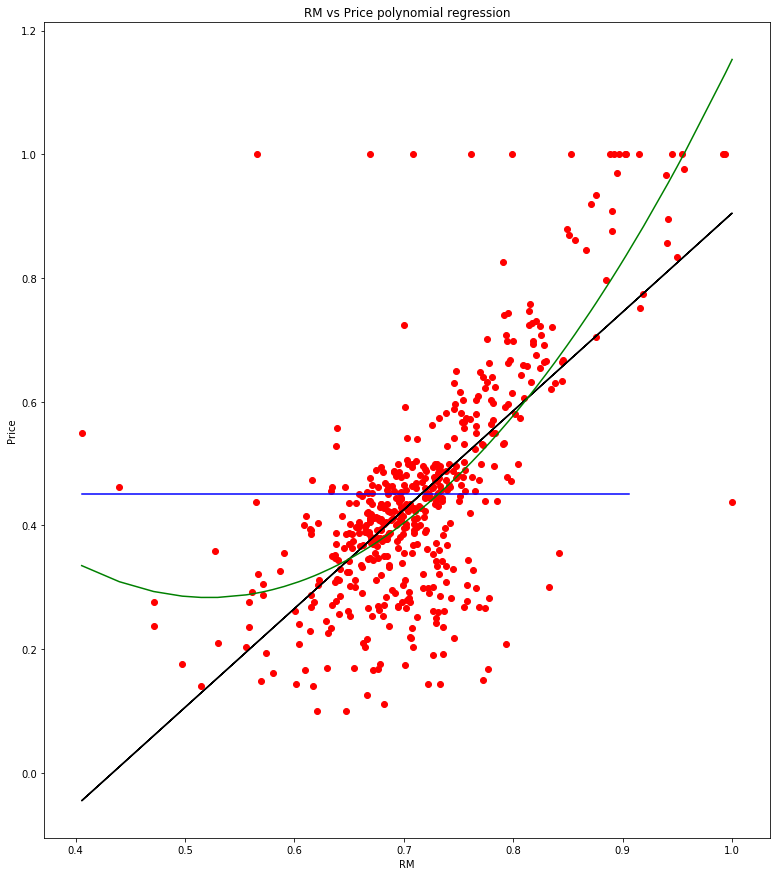

For degree:  1


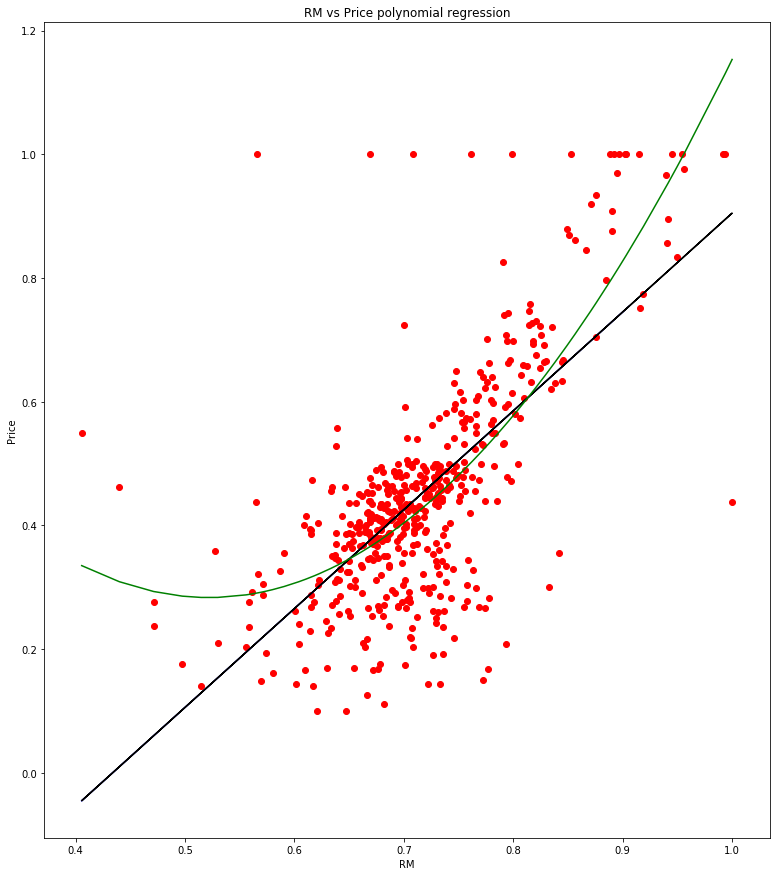

For degree:  2


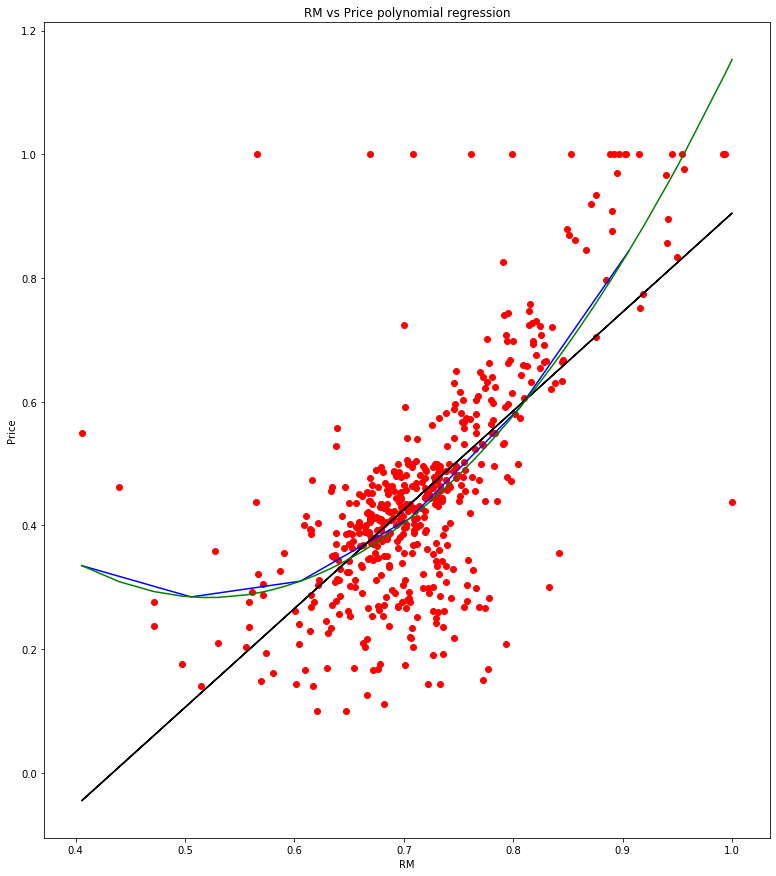

For degree:  3


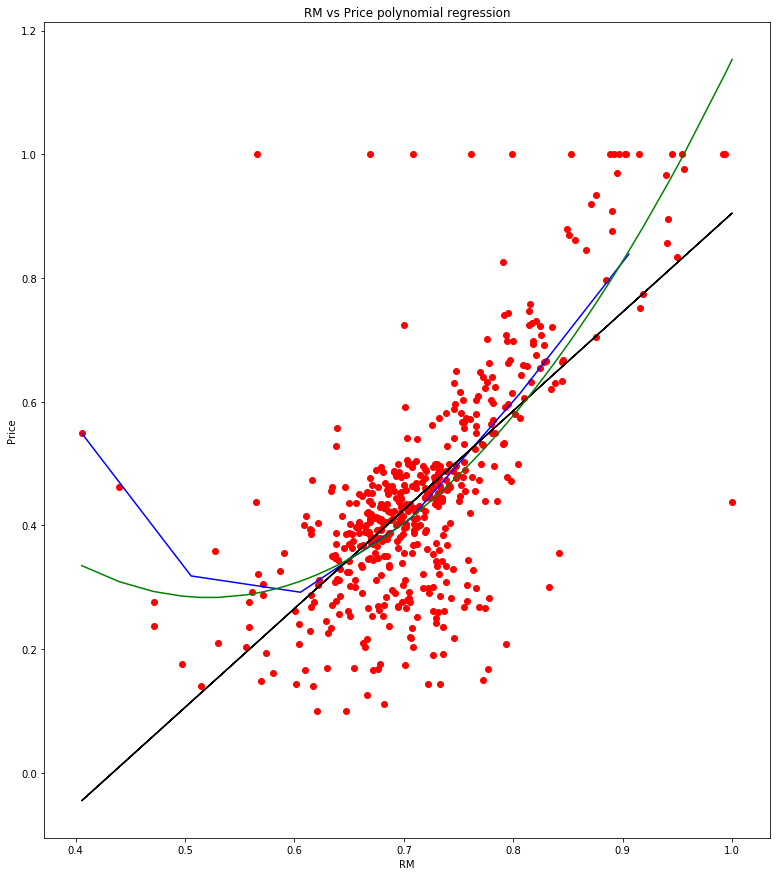

For degree:  4


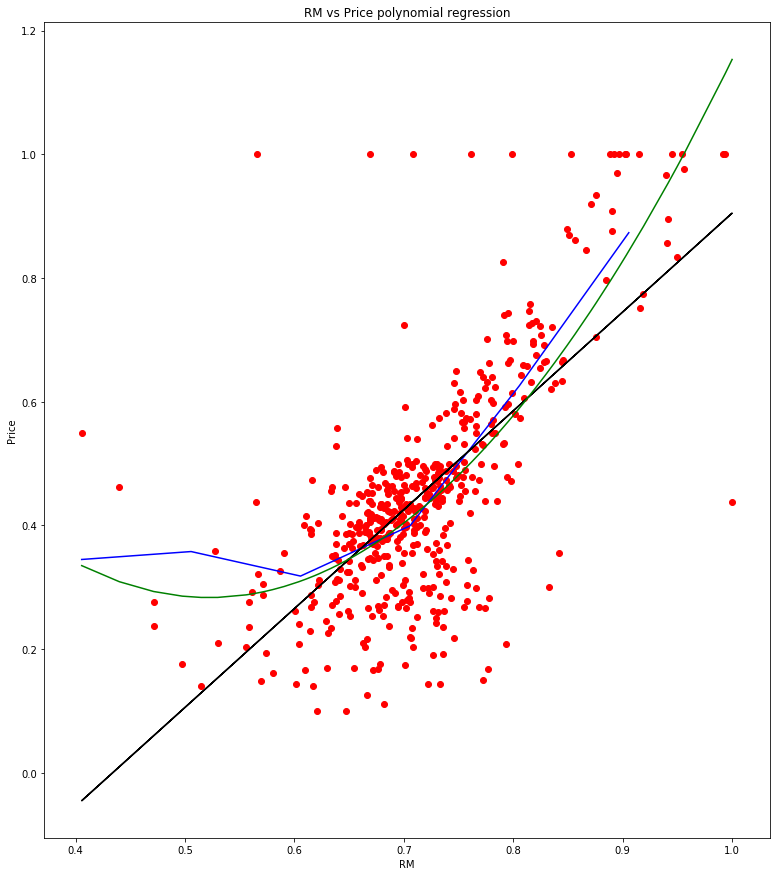

For degree:  5


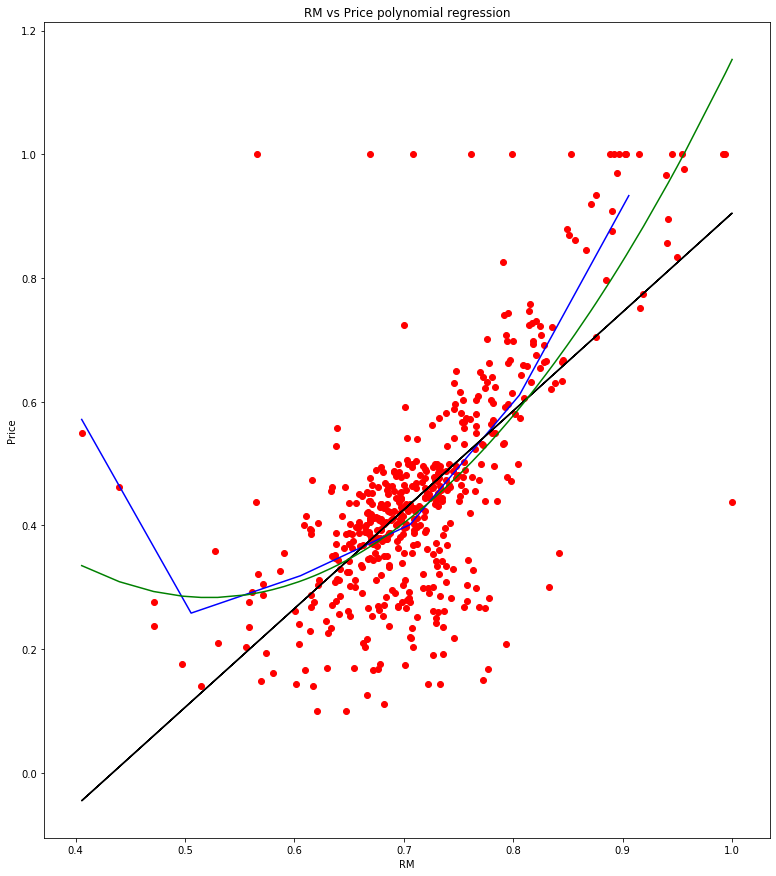

In [207]:
from sklearn.preprocessing import PolynomialFeatures

deg = [0,1,2,3,4,5]
ll = len(deg)
#print(ll)

for i in range (ll):
    print("For degree: ", deg[i])
    poly_reg = PolynomialFeatures(degree= deg[i])
    X_poly = poly_reg.fit_transform(X.reshape(-1,1))
    lin_reg2 = LinearRegression()
    lin_reg2.fit(X_poly,y)
    plt.figure(figsize=(13,15))

    X_grid = np.arange(min(X),max(X),0.1)
    X_grid = X_grid.reshape(len(X_grid),1) 
    plt.scatter(X,y, color='red') 
 
    plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)),color='blue') 

    plt.plot(x_c,y_pred,color='black',label='Linear Regression')
    plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')


 
    plt.title("RM vs Price polynomial regression")
    plt.xlabel('RM')
    plt.ylabel('Price')
    plt.show()

# Single variable cost function (linear reg.)

In [210]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [211]:
print("Y intercept")
print(regressor.intercept_)

Y intercept
-0.683149383529964


In [212]:
print("Slope ")
print(regressor.coef_)

Slope 
[1.58492796]


In [213]:
def Error3(Beta, data):

# b is constant
    b = (regressor.intercept_)

    price = []
    dataa =df_multi_sc.RM

# Loop to calculate predict salary variables
    for i in range(len(dataa)):
        tmp = dataa[i] * Beta + b
        price.append(tmp)

    MSE = mse(df_multi_sc.PRICE, price)
    return MSE

In [214]:
slope = [i/100 for i in range(0,150)]
Cost3 = []
for i in slope:
    cost = Error( Beta = i, data = df_multi_sc.RM)
    Cost3.append(cost)

In [215]:
Cost_table3 = pd.DataFrame({'Beta' : slope,'Cost' : Cost3})

## Cost for each Theta 1

In [216]:
print("Cost for each beta for RM")
Cost_table3.head()

Cost for each beta for RM


,Beta,Cost
0,0.00,1.319283
1,0.01,1.302899
2,0.02,1.286619
3,0.03,1.270443
4,0.04,1.254370


## Cost function

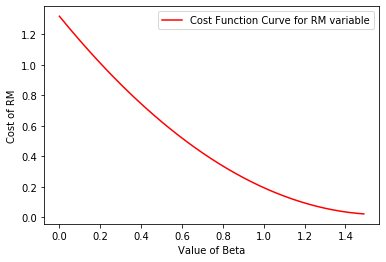

In [217]:
plt.plot(Cost_table3.Beta, Cost_table3.Cost, color = 'red', label = 'Cost Function Curve for RM variable')
plt.xlabel('Value of Beta')
plt.ylabel('Cost of RM')
plt.legend()

In [218]:
print("Best(actual) theta  ")
print(regressor.coef_)

Best(actual) theta  
[1.58492796]


# MULTIVariable regression

## Choosing RM ZN as they are directly proportional to price

In [219]:
df_multi = data.loc[:, ['ZN', 'RM', 'PRICE']]
df_multi.head()

,ZN,RM,PRICE
0,18.0,6.575,24.0
1,0.0,6.421,21.6
2,0.0,7.185,34.7
3,0.0,6.998,33.4
4,0.0,7.147,36.2


In [220]:
df_multi_sc = df_multi.copy()
  
# apply normalization techniques
for column in df_multi_sc.columns:
    df_multi_sc[column] = df_multi_sc[column]  / df_multi_sc[column].abs().max()
      
# view normalized data
df_multi_sc.head()

,ZN,RM,PRICE
0,0.18,0.748861,0.480
1,0.00,0.731321,0.432
2,0.00,0.818337,0.694
3,0.00,0.797039,0.668
4,0.00,0.814009,0.724


In [221]:
X_multi = df_multi_sc[['ZN', 'RM']]
y_multi = df_multi_sc['PRICE']

In [222]:
print("X: ", X_multi.head())
print("X shape: ", X_multi.shape)

X:       ZN        RM
0  0.18  0.748861
1  0.00  0.731321
2  0.00  0.818337
3  0.00  0.797039
4  0.00  0.814009
X shape:  (506, 2)


In [223]:
print("y: ", y_multi.head())
print("y shape: ", y_multi.shape)

y:  0    0.480
1    0.432
2    0.694
3    0.668
4    0.724
Name: PRICE, dtype: float64
y shape:  (506,)


In [224]:
print("X shape ", X_multi.shape)
print("y shape ", y_multi.shape)


X shape  (506, 2)
y shape  (506,)


In [225]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, train_size=0.6, random_state=0)

In [226]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (303, 2)
y_train shape (303,)
X_test shape (203, 2)
y_test shape (203,)


In [227]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Theta 1 and Theta 2

In [228]:
coeff_df = pd.DataFrame(regressor.coef_, X_multi.columns, columns=['Coefficient'])
coeff_df

,Coefficient
ZN,0.148036
RM,1.441802


In [229]:
print("Coeff for ZN : ", coeff_df['Coefficient'][0])
print("Coeff for RM : ", coeff_df['Coefficient'][1])

Coeff for ZN :  0.14803554643153619
Coeff for RM :  1.4418016045806714


## Theta 0 (intercept)

In [230]:
print("Y intercept")
print(regressor.intercept_)

Y intercept
-0.5982545480038743


In [231]:
y_pred = regressor.predict(X_test)
print("y pred = predicted price: ", y_pred.shape)

y pred = predicted price:  (203,)


## Actual Vs predicted prices

In [232]:
print("Actual price vs predicted price")
df_multi_comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_multi_comp.head()

Actual price vs predicted price


,Actual,Predicted
329,0.452,0.441715
371,1.000,0.422502
219,0.460,0.448283
403,0.166,0.280128
78,0.424,0.425129


## Errors for multi-var linear regression

In [233]:
from sklearn import metrics
print("For linear regression multi variable: ")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R squared error: ", metrics.r2_score(y_test,y_pred))


For linear regression multi variable: 
Mean Absolute Error: 0.0899304436513901
Mean Squared Error: 0.017080677673348334
Root Mean Squared Error: 0.130693066661351
R squared error:  0.48384611402154976


## Plotting RM and ZN Vs price and the Hypithesis

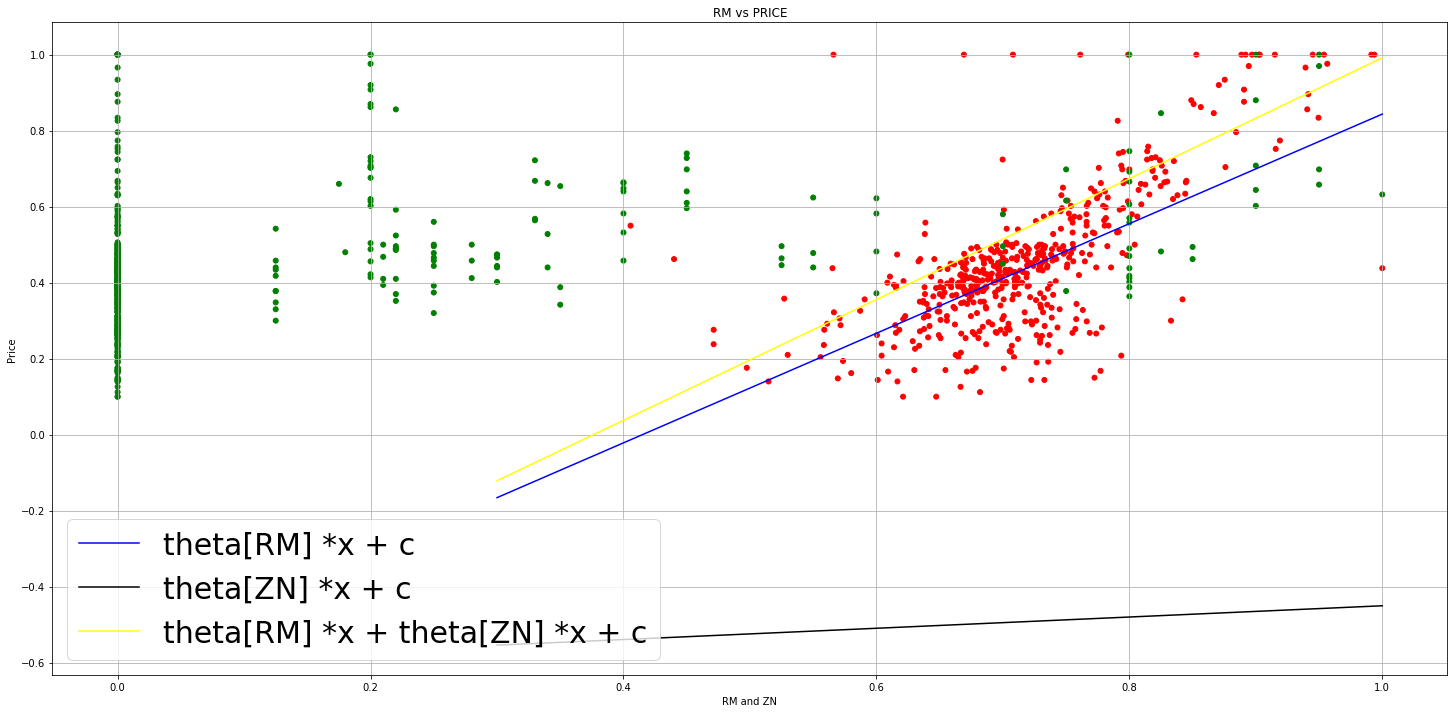

In [255]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(25, 12))

x = np.linspace(0.3,1,10)
y_1 = (coeff_df['Coefficient'][1])*x+(regressor.intercept_)
y_2 = (coeff_df['Coefficient'][0])*x+(regressor.intercept_)
y_3 = (coeff_df['Coefficient'][1])*x+coeff_df['Coefficient'][0]*x +(regressor.intercept_)

plt.plot(x, y_1, 'b', label='theta[RM] *x + c')
plt.plot(x, y_2, 'black', label='theta[ZN] *x + c')
plt.plot(x, y_3, 'yellow', label='theta[RM] *x + theta[ZN] *x + c')

draw_scatter(df_multi_sc, "RM","PRICE", "RM vs PRICE", 'r')
draw_scatter(df_multi_sc, "ZN","PRICE", "RM vs PRICE", 'g')

#plt.scatter(x=df_multi_sc["ZN"],y=df_multi_sc["Price"], s= [25,25], c= 'g')
plt.xlabel('RM and ZN')
plt.ylabel('Price')
plt.grid()
plt.legend()
leg = plt.legend(prop={"size":30})

plt.show()
#plt.legend()

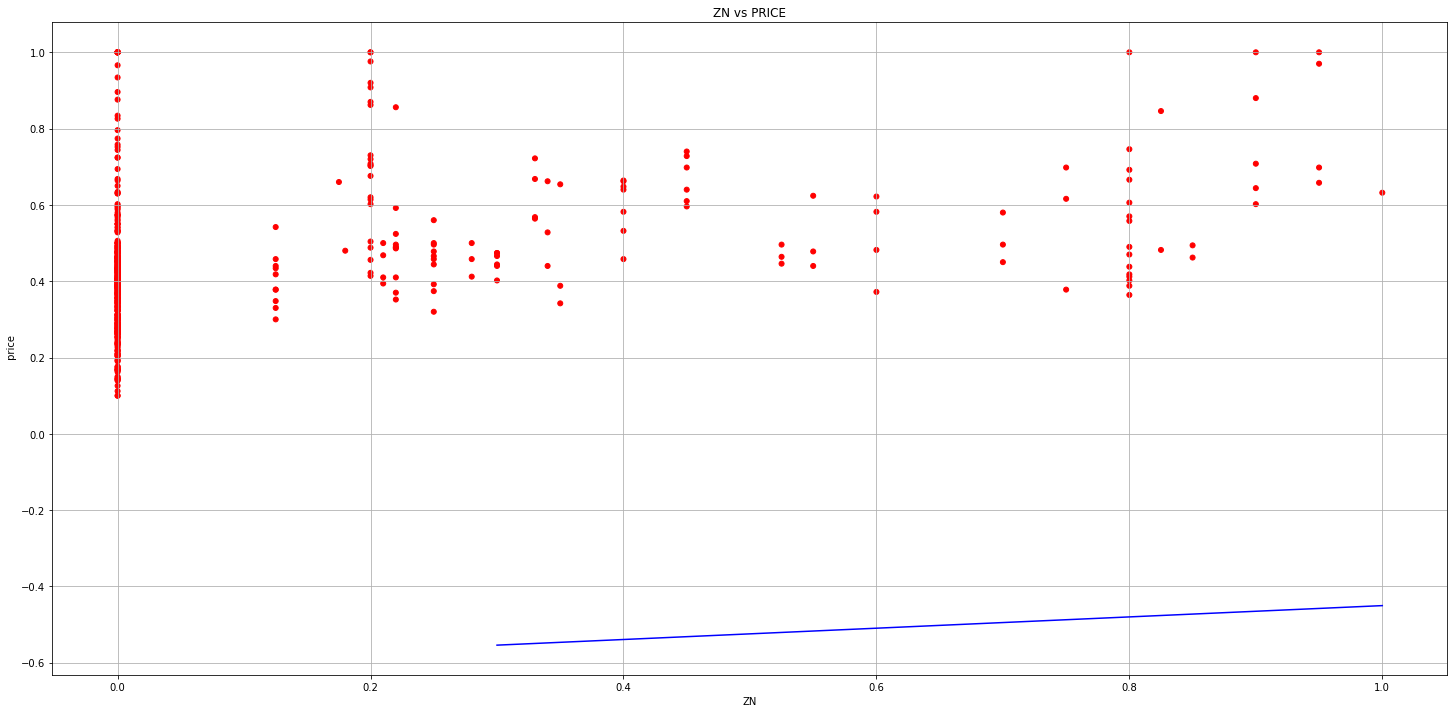

In [256]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(25, 12))

x = np.linspace(0.3,1,10)
y = (coeff_df['Coefficient'][0])*x+(regressor.intercept_)
plt.plot(x, y, 'b', label='y=2x+1')
draw_scatter(df_multi_sc, "ZN","PRICE", "ZN vs PRICE", 'r')
plt.xlabel('ZN')
plt.ylabel(' price')
plt.grid()
plt.show()

Text(0.5, 1.0, 'Beta value 1.5 with MSE 0.08078120481212876')

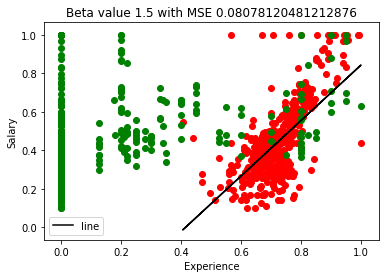

In [261]:
#trying different beta
from sklearn.metrics import mean_squared_error as mse
beta_rm = 1.441802
beta_zn = 0.148036
# keeping intercept constant
b = (regressor.intercept_)

# to store predicted points
line1 = []

# generating predictions for every data point
for i in range(len(df_multi_sc)):
    line1.append(df_multi_sc.RM[i]*beta_rm  + b)

# Plotting the line
plt.scatter(df_multi_sc.RM, df_multi_sc.PRICE, color = 'red')
plt.scatter(df_multi_sc.ZN, df_multi_sc.PRICE, color = 'g')

plt.plot(df_multi_sc.RM, line1, color = 'black', label = 'line')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()

MSE = mse(df_multi_sc.RM, line1)

plt.title("Beta value "+str(beta)+" with MSE "+ str(MSE))

#MSE = mse(df_multi_sc.RM, line1)

## Cost function for Theta 1

In [262]:
def Error(Beta, data):

# b is constant
    b = (regressor.intercept_)

    price = []
    rm =df_multi_sc.RM

# Loop to calculate predict salary variables
    for i in range(len(df_multi_sc.RM)):
        tmp = df_multi_sc.RM[i] * Beta + b
        price.append(tmp)

    MSE = mse(df_multi_sc.PRICE, price)
    return MSE

In [263]:
slope = [i/100 for i in range(0,150)]
Cost = []
for i in slope:
    cost = Error( Beta = i, data = X_multi["RM"])
    Cost.append(cost)

In [264]:
Cost_table = pd.DataFrame({'Beta' : slope,'Cost' : Cost})

In [265]:

print("Cost for each beta for RM")
Cost_table.head()

Cost for each beta for RM


,Beta,Cost
0,0.00,1.133981
1,0.01,1.118813
2,0.02,1.103748
3,0.03,1.088787
4,0.04,1.073930


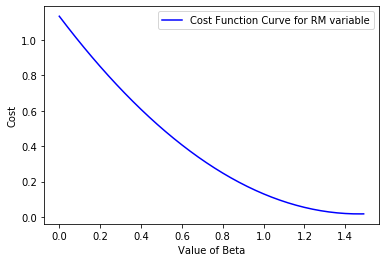

In [266]:
plt.plot(Cost_table.Beta, Cost_table.Cost, color = 'blue', label = 'Cost Function Curve for RM variable')
plt.xlabel('Value of Beta')
plt.ylabel('Cost')
plt.legend()

## Cost function for Theta 2

In [267]:
def Error2(Beta, data):

# b is constant
    b = (regressor.intercept_)

    price = []
    rm =df_multi_sc.ZN

# Loop to calculate predict salary variables
    for i in range(len(df_multi_sc.ZN)):
        tmp = df_multi_sc.ZN[i] * Beta + b
        price.append(tmp)

    MSE = mse(df_multi_sc.PRICE, price)
    return MSE

In [268]:
slope = [i/100 for i in range(0,150)]
Cost2 = []
for i in slope:
    cost = Error2( Beta = i, data = X_multi["ZN"])
    Cost2.append(cost)

In [269]:
Cost_table2 = pd.DataFrame({'Beta' : slope,'Cost' : Cost2})

In [270]:
print("Cost table for each beta for ZN")
Cost_table2.head()

Cost table for each beta for ZN


,Beta,Cost
0,0.00,1.133981
1,0.01,1.131296
2,0.02,1.128623
3,0.03,1.125964
4,0.04,1.123319


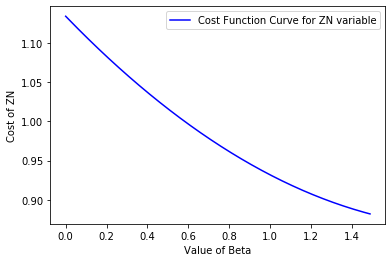

In [271]:
plt.plot(Cost_table2.Beta, Cost_table2.Cost, color = 'blue', label = 'Cost Function Curve for ZN variable')
plt.xlabel('Value of Beta')
plt.ylabel('Cost of ZN')
plt.legend()

Text(0.5, 1.0, 'Beta value 1.441802 with MSE 0.08078120481212876')

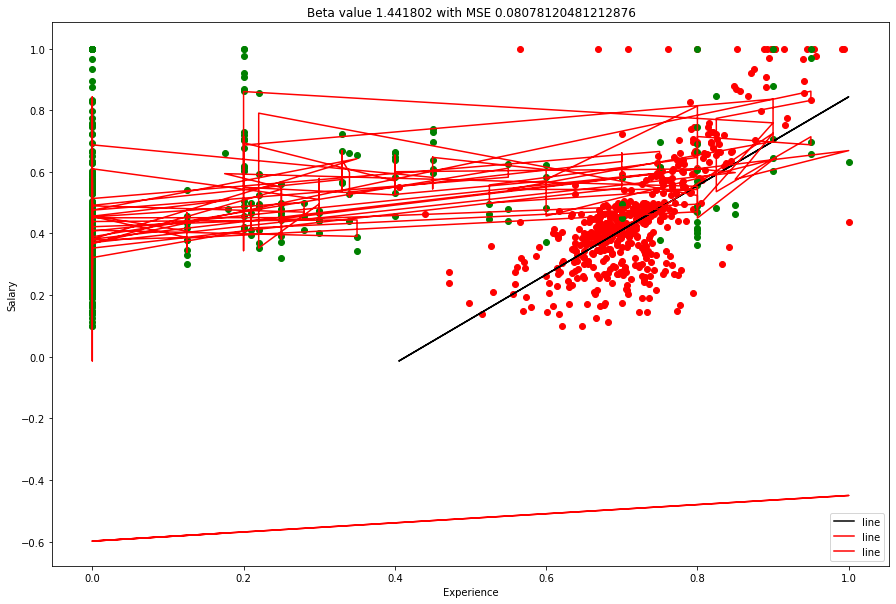

In [286]:
#trying different beta
from sklearn.metrics import mean_squared_error as mse
beta_rm = 1.441802
beta_zn = 0.148036
# keeping intercept constant
b = (regressor.intercept_)

# to store predicted points
line1 = []
line2 = []
line3 = []
# generating predictions for every data point
for i in range(len(df_multi_sc)):
    line1.append(df_multi_sc.RM[i]*beta_rm   +  b)
    
for i in range(len(df_multi_sc)):
    line2.append(df_multi_sc.ZN[i]*beta_zn   +  b)
    
for i in range(len(df_multi_sc)):
    line3.append(df_multi_sc.ZN[i]*beta_zn+ df_multi_sc.RM[i]*beta_rm    +  b)
    
    
plt.figure(figsize=(15,10)) 
xxx = np.linspace(0.3,1,10)

# Plotting the line
plt.scatter(df_multi_sc.RM, df_multi_sc.PRICE, color = 'red')
plt.scatter(df_multi_sc.ZN, df_multi_sc.PRICE, color = 'g')

plt.plot(df_multi_sc.RM, line1, color = 'black', label = 'line')
plt.plot(df_multi_sc.ZN, line2, color = 'r', label = 'line')
plt.plot(df_multi_sc.ZN, line3, color = 'r', label = 'line')


plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()

MSE = mse(df_multi_sc.RM, line1)

plt.title("Beta value "+str(beta_rm)+" with MSE "+ str(MSE))

#MSE = mse(df_multi_sc.RM, line1)

## Analyzing different degrees with their R2 score

In [311]:
df_max_scaled.head()

,RM,PRICE
0,0.748861,0.480
1,0.731321,0.432
2,0.818337,0.694
3,0.797039,0.668
4,0.814009,0.724


In [312]:
c1= np.array(df_max_scaled["RM"])

In [314]:
c2= np.array(df_max_scaled["PRICE"])

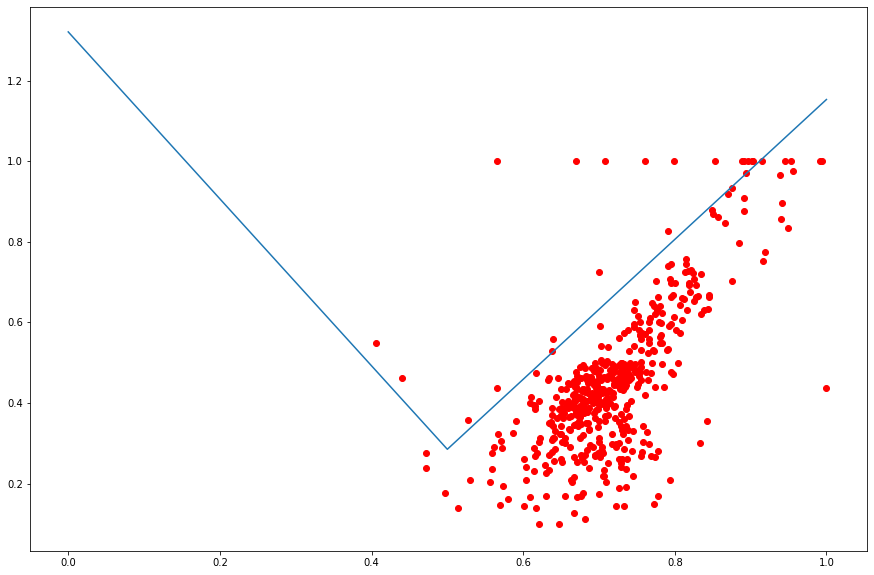

0.5484256373971057


In [327]:
from sklearn.metrics import r2_score

mymodel = numpy.poly1d(numpy.polyfit(c1,c2, 2))
plt.figure(figsize=(15,10)) 

myline = numpy.linspace(0, 1, 3)

plt.scatter(c1, c2,color = 'red')
plt.plot(myline, mymodel(myline))
plt.show()
print(r2_score(c2, mymodel(c1)))
